In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report
from sklearn.preprocessing import StandardScaler

import joblib


In [3]:
df = pd.read_csv("C:/Users/varsh/Downloads/archive (2)/UCI_Credit_Card.csv")
df.shape

(30000, 25)

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [6]:
df.isnull().sum()


ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [64]:
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isnull().sum()


ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [9]:
num_cols=['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month']
for i in [num_cols]:
    Q1 = df[num_cols].quantile(0.25)
    Q3 = df[num_cols].quantile(0.75)
    IQR = Q3 - Q1

    outliers = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).sum()

    print("Number of outliers per column:\n", outliers)

Number of outliers per column:
 ID                               0
LIMIT_BAL                      167
SEX                              0
EDUCATION                      454
MARRIAGE                         0
AGE                            272
PAY_0                         3130
PAY_2                         4410
PAY_3                         4209
PAY_4                         3508
PAY_5                         2968
PAY_6                         3079
BILL_AMT1                     2400
BILL_AMT2                     2395
BILL_AMT3                     2469
BILL_AMT4                     2622
BILL_AMT5                     2725
BILL_AMT6                     2693
PAY_AMT1                      2745
PAY_AMT2                      2714
PAY_AMT3                      2598
PAY_AMT4                      2994
PAY_AMT5                      2945
PAY_AMT6                      2958
default.payment.next.month    6636
dtype: int64


Accuracy: 0.8183333333333334
Confusion Matrix:
 [[4482  191]
 [ 899  428]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      4673
           1       0.69      0.32      0.44      1327

    accuracy                           0.82      6000
   macro avg       0.76      0.64      0.67      6000
weighted avg       0.80      0.82      0.79      6000

ROC-AUC: 0.7006149421607977


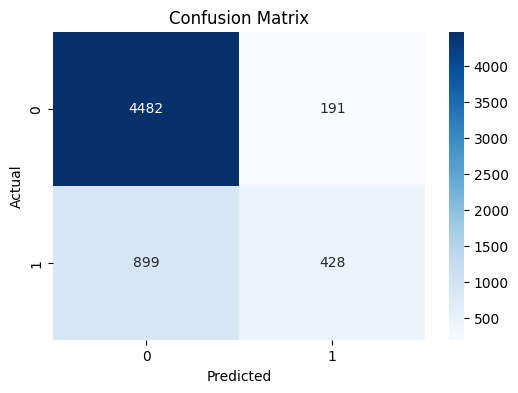

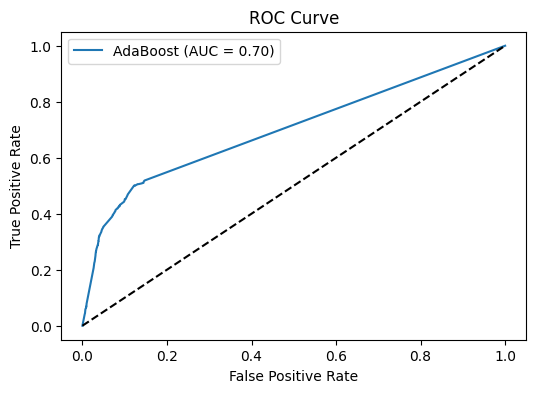


Sample Prediction → No Default
Probability of Default: 0.12


In [35]:
if 'default.payment.next.month' in df.columns:
    df.rename(columns={'default.payment.next.month': 'default'}, inplace=True)

selected_columns = ['PAY_0', 'PAY_AMT2', 'LIMIT_BAL', 'PAY_2', 'PAY_AMT3', 'BILL_AMT1', 'PAY_AMT1', 'MARRIAGE']
X = df[selected_columns]
y = df["default"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

base_estimator = DecisionTreeClassifier(max_depth=3, random_state=42)
model = AdaBoostClassifier(estimator=base_estimator, n_estimators=200, random_state=42)
model.fit(X_train, y_train)

param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.5, 1.0]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(
    estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3), random_state=42),
    param_grid=param_grid,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1
)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1]))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label="AdaBoost (AUC = {:.2f})".format(roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1])))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

sample_input = {
    'PAY_0': [0],
    'PAY_AMT2': [5000],
    'LIMIT_BAL': [50000],
    'PAY_2': [0],
    'PAY_AMT3': [5000],
    'BILL_AMT1': [10000],
    'PAY_AMT1': [5000],
    'MARRIAGE': [1]
}

sample_df = pd.DataFrame(sample_input)
sample_scaled = scaler.transform(sample_df) 
prediction = best_model.predict(sample_scaled)[0]
proba = best_model.predict_proba(sample_scaled)[0][1]

print("\nSample Prediction →", "Default" if prediction == 1 else "No Default")
print("Probability of Default:", round(proba, 2))


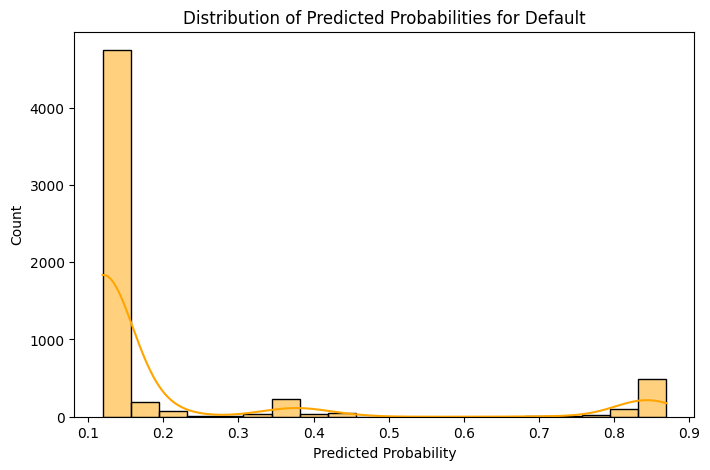

In [36]:
y_probs = best_model.predict_proba(X_test)[:,1]
plt.figure(figsize=(8,5))
sns.histplot(y_probs, bins=20, kde=True, color="orange")
plt.title("Distribution of Predicted Probabilities for Default")
plt.xlabel("Predicted Probability")
plt.ylabel("Count")
plt.show()


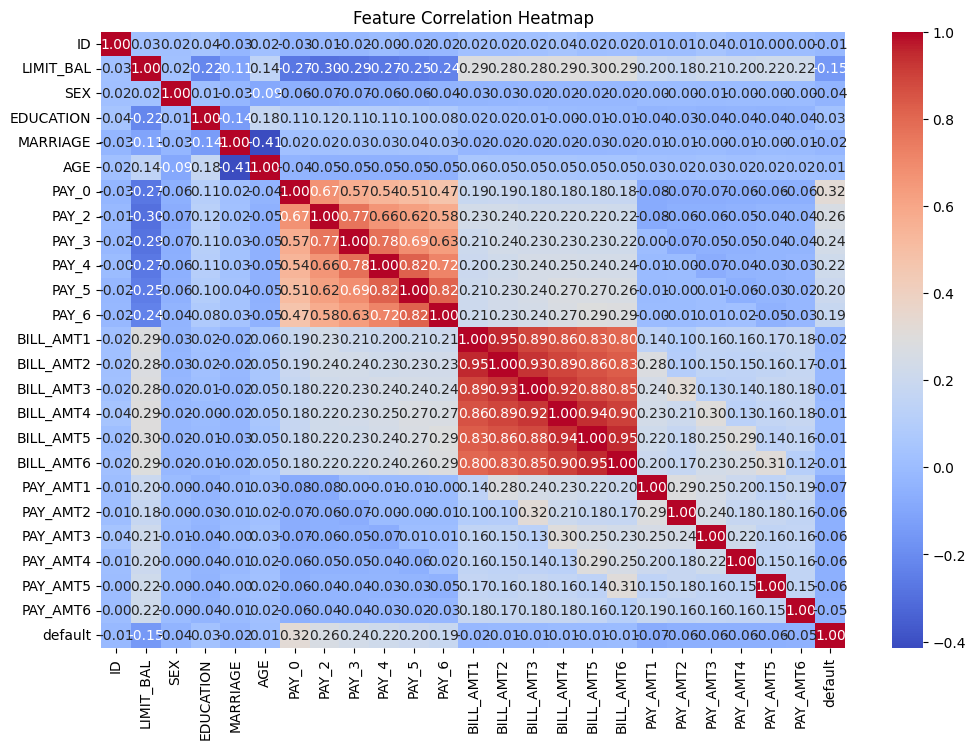

In [37]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

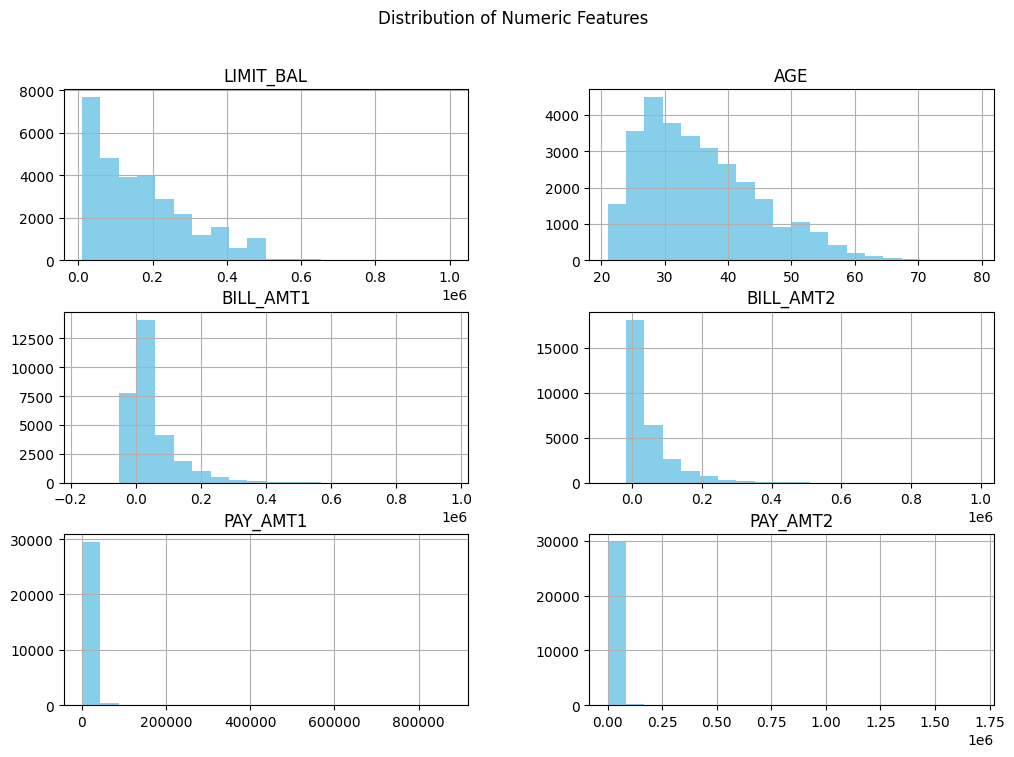

In [38]:
numeric_features = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','PAY_AMT1','PAY_AMT2']
df[numeric_features].hist(figsize=(12,8), bins=20, color='skyblue')
plt.suptitle('Distribution of Numeric Features')

plt.show()

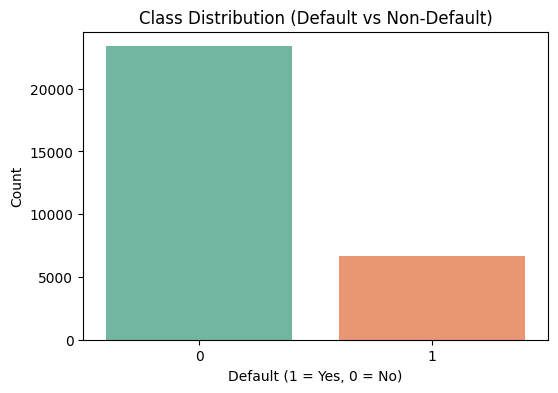

In [39]:
plt.figure(figsize=(6,4))
sns.countplot(x='default', data=df, palette='Set2')  
plt.title("Class Distribution (Default vs Non-Default)")
plt.xlabel("Default (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

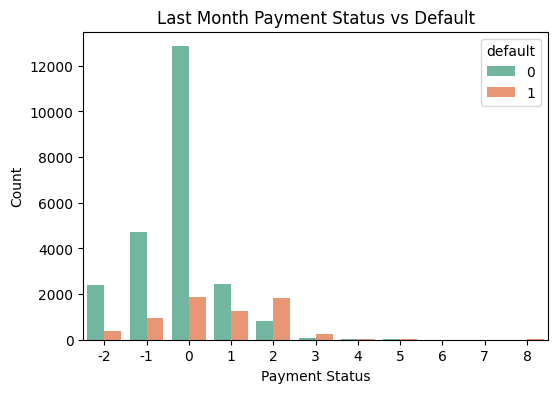

In [40]:
plt.figure(figsize=(6,4))
sns.countplot(x='PAY_0', hue='default', data=df, palette='Set2')
plt.title("Last Month Payment Status vs Default")
plt.xlabel("Payment Status")
plt.ylabel("Count")
plt.show()

In [41]:
import pickle


with open("trained_model.sav", "wb") as f:
    pickle.dump((model, scaler), f)
    filename = 'trained_model.sav'



In [43]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
